# Python Pandas tutorial

***

*References*-
- [Python Pandas Tutorial: A Complete Introduction for Beginners](https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Pandas has 2 most important components:
- Series
- DataFrame

Series is essentially a column. On the other hand, a column is simply a multi-dimensional matrix, or rather a collection of series.

## Creating DataFrames-

In [2]:
apples = np.random.randint(10,size=(4))
oranges= np.random.randint(10,size=(4))

data = {
    'apples' :apples,
    'oranges':oranges
}

purchases = pd.DataFrame(data, index=['Customer A','Customer B','Customer C','Customer D'])
purchases

,apples,oranges
Customer A,1,0
Customer B,8,7
Customer C,9,5
Customer D,1,0


In [3]:
purchases.loc['Customer B']

apples     8
oranges    7
Name: Customer B, dtype: int32

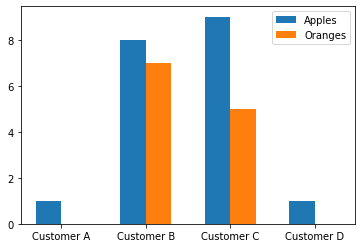

In [4]:
index = np.arange(4)
width = 0.30

plt.bar(index, apples, width, label='Apples')
plt.bar(index+width, oranges, width, label='Oranges')
plt.legend()
plt.xticks(index+width/2, ['Customer A','Customer B','Customer C','Customer D'])

plt.show()

## Importing dataframes from other sources-

- Importing data from *csv* files-

In [5]:
file_name = 'iris.csv'
data_csv = pd.read_csv(file_name)
data_csv.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


- Importing data from *JSON* files-

In [6]:
file_name = 'iris.json'
data_json = pd.read_json(file_name)
data_json.head(10)

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


We can also convert the files from *csv* to *JSON* and vice-versa. 

In [7]:
data_json.to_csv('iris_new.csv')

### Analyzing the dataset-

In [8]:
data_csv.sample(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
149,5.9,3.0,5.1,1.8,Virginica
82,5.8,2.7,3.9,1.2,Versicolor
56,6.3,3.3,4.7,1.6,Versicolor
85,6.0,3.4,4.5,1.6,Versicolor
112,6.8,3.0,5.5,2.1,Virginica
122,7.7,2.8,6.7,2.0,Virginica
134,6.1,2.6,5.6,1.4,Virginica
27,5.2,3.5,1.5,0.2,Setosa
148,6.2,3.4,5.4,2.3,Virginica
38,4.4,3.0,1.3,0.2,Setosa


In [9]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal.length    150 non-null float64
sepal.width     150 non-null float64
petal.length    150 non-null float64
petal.width     150 non-null float64
variety         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
data_csv.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

Check if there is any null value under any column in the dataset.

In [14]:
data_csv.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

Null data can be easily removed **data_csv.dropna()**.

In [16]:
data_csv['variety'].value_counts()

Versicolor    50
Virginica     50
Setosa        50
Name: variety, dtype: int64

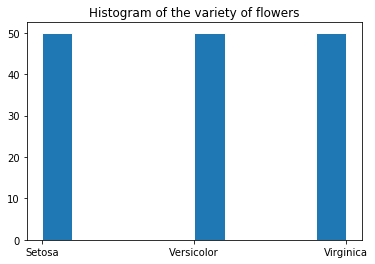

In [27]:
plt.hist(data_csv['variety'], edgecolor='white')
plt.title('Histogram of the variety of flowers')
plt.show()

This is a very important step in data analysis- **Correlation** between columns. Any correlation value above 0.7 implies they are related and a scatter plot between them can help us to differentiate between the varieties.

In [29]:
data_csv.corr()

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


A correlation value between Sepal length and Petal length is 0.872, which is quite interesting. Similarly Petal width and Petal length shows strong correlation of 0.963. On the other hand, Sepal width and Sepal length shows quite weak correlation.

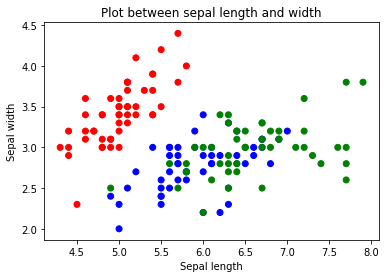

In [12]:
cols = []
for i in data_csv['variety']:
    if i=='Setosa':
        cols.append('red')
    if i=='Virginica':
        cols.append('green')
    if i=='Versicolor':
        cols.append('blue')

plt.scatter(data_csv['sepal.length'], data_csv['sepal.width'], c=cols)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Plot between sepal length and width')
plt.show()

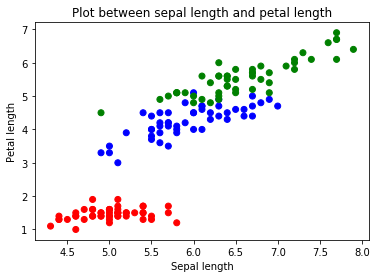

In [30]:
plt.scatter(data_csv['sepal.length'], data_csv['petal.length'], c=cols)
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.title('Plot between sepal length and petal length')
plt.show()

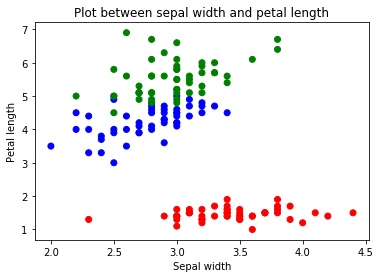

In [31]:
plt.scatter(data_csv['sepal.width'], data_csv['petal.length'], c=cols)
plt.xlabel('Sepal width')
plt.ylabel('Petal length')
plt.title('Plot between sepal width and petal length')
plt.show()

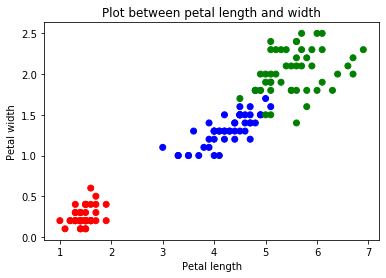

In [13]:
plt.scatter(data_csv['petal.length'], data_csv['petal.width'], c=cols)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Plot between petal length and width')
plt.show()

## DataFrame slicing and extraction-

We can extract Series from DataFrames in the following way-

In [37]:
variety = data_csv[['variety']]
variety.head(5)

,variety
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [39]:
variety_sepal_length = data_csv[['variety','sepal.length']]
variety_sepal_length.sample(5)

,variety,sepal.length
33,Setosa,5.5
143,Virginica,6.8
82,Versicolor,5.8
122,Virginica,7.7
57,Versicolor,4.9


We can also extract columns from DataFrames. There are 2 ways for that-
- .loc - Locates by name.
- .iloc- Locates by numerical index

In [47]:
data_csv.iloc[np.random.randint(1,150)]

sepal.length          6.5
sepal.width             3
petal.length          5.2
petal.width             2
variety         Virginica
Name: 147, dtype: object

We can add a condition based statement in the DataFrame.

In [56]:
data_csv[data_csv['variety']=="Versicolor"].head()

,sepal.length,sepal.width,petal.length,petal.width,variety
50,7.0,3.2,4.7,1.4,Versicolor
51,6.4,3.2,4.5,1.5,Versicolor
52,6.9,3.1,4.9,1.5,Versicolor
53,5.5,2.3,4.0,1.3,Versicolor
54,6.5,2.8,4.6,1.5,Versicolor


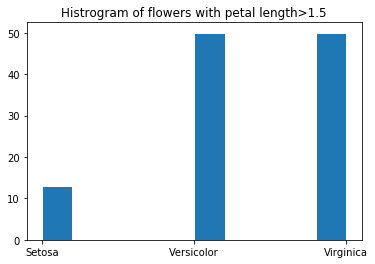

In [74]:
cond_data = data_csv[data_csv['petal.length']>1.5]

plt.hist(cond_data['variety'],edgecolor='white')
plt.title('Histrogram of flowers with petal length>1.5')
plt.show()

## Applying Functions-

In [105]:
def favourite(x):
    if (x>3) & (x<5):
        return "Y"
    else:
        return "N"

In [106]:
data_csv['favourite'] = data_csv['petal.length'].apply(favourite)
data_csv[['variety','petal.length','favourite']].sample(5)

,variety,petal.length,favourite
86,Versicolor,4.7,Y
107,Virginica,6.3,N
106,Virginica,4.5,Y
0,Setosa,1.4,N
76,Versicolor,4.8,Y


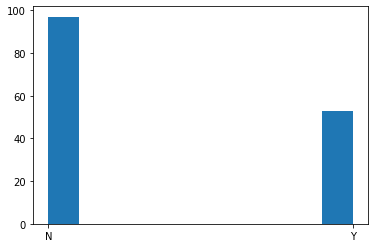

In [107]:
plt.hist(data_csv['favourite'])
plt.show()

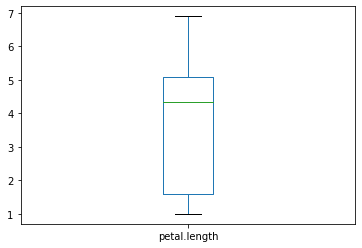

In [108]:
data_csv['petal.length'].plot(kind='box')

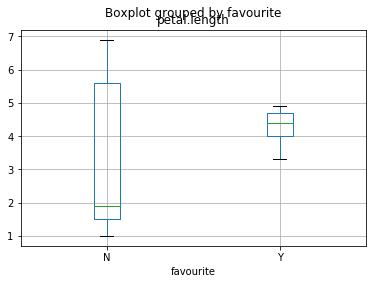

In [112]:
data_csv.boxplot(column='petal.length', by='favourite')